In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import missingno as mnso
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import *
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
MAINPATH=r"C:\Users\Manasi\Desktop\ads\midterm\data\historical_2005"
TRAINFILENAME="cleanfile2005_Q2.txt"
TESTFILENAME="cleanfile2005_Q3.txt"

In [31]:
Train_DF = pd.read_csv(MAINPATH+"/"+TRAINFILENAME,index_col=None)

In [32]:
Test_DF=pd.read_csv(MAINPATH+"/"+TESTFILENAME,index_col=None)

In [33]:
def dummyvar(df):
    dumvar=df
    dumvar.select_dtypes(include=['object']).copy()
    #dumvar=pd.get_dummies(dumvar, columns=["PPM_FLAG"], prefix=["ppm"])
    lb_make = LabelEncoder()
    dumvar["PPM_FLAG_CODE"] = lb_make.fit_transform(dumvar["PPM_FLAG"])
    dumvar["LOAN_PURPOSE_CODE"] = lb_make.fit_transform(dumvar["LOAN_PURPOSE"])
    dumvar["OCCUPANCY_STATS_CODE"] = lb_make.fit_transform(dumvar["OCCUPANCY_STATS"])
    dumvar["PROP_TYPE_CODE"] = lb_make.fit_transform(dumvar["PROP_TYPE"])
    dumvar["FIRST_HOME_BUYER_FLAG_CODE"] = lb_make.fit_transform(dumvar["FIRST_HOME_BUYER_FLAG"])
    dumvar["PROP_STATE_CODE"] = lb_make.fit_transform(dumvar["PROP_STATE"])
    dumvar["CHANNEL_CODE"] = lb_make.fit_transform(dumvar["CHANNEL"])
    dumvar["SELLER_NAME_CODE"] = lb_make.fit_transform(dumvar["SELLER_NAME"])
    dumvar["SERVICE_NAME_CODE"] = lb_make.fit_transform(dumvar["SERVICE_NAME"])
    return dumvar
    

In [34]:
a= dummyvar(Train_DF)
b= dummyvar(Test_DF)

In [35]:
X_train=a.select_dtypes(include=['number'])
Y_train =b.select_dtypes(include=['number'])


In [36]:
X=X_train.drop('OG_IR',axis=1)
Y=Y_train.drop('OG_IR',axis=1)
X1=X_train.OG_IR
Y1=Y_train.OG_IR

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
A=scale(X_train)
pca=PCA()
pca.fit(A)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

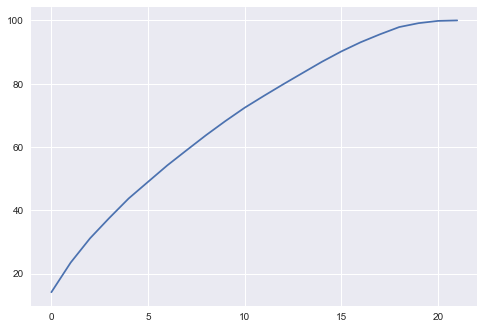

In [56]:
plt.plot(var1)
plt.show()

In [37]:
# f regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
r=Selector_f.fit(X,X1)
for n,s in zip(X_train.columns,Selector_f.scores_):
    print ('F-score: %3.2ft for feature %s' % (s,n))

F-score: 58216.00t for feature Unnamed: 0
F-score: 12320.97t for feature CREDIT_SCORE
F-score: 282.59t for feature MSA
F-score: 18098.76t for feature MI_PERCENT
F-score: 412.28t for feature N_UNITS
F-score: 14651.86t for feature OG_CLTV
F-score: 777.00t for feature OG_DTI
F-score: 8334.21t for feature OG_UPB
F-score: 16604.64t for feature OG_LTV
F-score: 552.37t for feature OG_IR
F-score: 64682.43t for feature POSTALCODE
F-score: 2314.05t for feature OG_LOANTERM
F-score: 614.80t for feature NO_BORROWERS
F-score: 376.92t for feature PPM_FLAG_CODE
F-score: 4354.26t for feature LOAN_PURPOSE_CODE
F-score: 417.34t for feature OCCUPANCY_STATS_CODE
F-score: 1072.80t for feature PROP_TYPE_CODE
F-score: 6.73t for feature FIRST_HOME_BUYER_FLAG_CODE
F-score: 2942.26t for feature PROP_STATE_CODE
F-score: 431.20t for feature CHANNEL_CODE
F-score: 1089.15t for feature SELLER_NAME_CODE


In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

import pandas as pd
scaler = StandardScaler()
A = scaler.fit_transform(X)
B = X1
names = X.columns



In [51]:
#df = pd.DataFrame()
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    # Create a column of feature names
    df['Feature Name'] = names
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        # Fit the lasso regression
        lasso.fit(A, B)
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        # Create a column of coefficient values
        df[column_name] = lasso.coef_
    # Return the datafram    
    return df

In [52]:
# Run the function called, Lasso
lasso([.0001, .5, 10])

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,Unnamed: 0,-0.061290,-0.0,-0.0
1,CREDIT_SCORE,-0.039544,-0.0,-0.0
2,MSA,0.001777,-0.0,-0.0
3,MI_PERCENT,0.039913,0.0,0.0
4,N_UNITS,0.012942,0.0,0.0
5,OG_CLTV,0.000000,0.0,0.0
6,OG_DTI,-0.002972,0.0,0.0
7,OG_UPB,-0.070587,-0.0,-0.0
8,OG_LTV,0.021723,0.0,0.0
9,POSTALCODE,-0.009702,-0.0,-0.0


In [54]:
# Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(A, B)
#result=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X1.columns))
print ("Features sorted by their rank:")
#pd.DataFrame(result)
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'OG_LOANTERM'), (2, 'OG_UPB'), (3, 'Unnamed: 0'), (4, 'CREDIT_SCORE'), (5, 'CHANNEL_CODE'), (6, 'MI_PERCENT'), (7, 'OCCUPANCY_STATS_CODE'), (8, 'SELLER_NAME_CODE'), (9, 'SERVICE_NAME_CODE'), (10, 'LOAN_PURPOSE_CODE'), (11, 'OG_LTV'), (12, 'N_UNITS'), (13, 'PPM_FLAG_CODE'), (14, 'PROP_TYPE_CODE'), (15, 'POSTALCODE'), (16, 'PROP_STATE_CODE'), (17, 'NO_BORROWERS'), (18, 'OG_DTI'), (19, 'MSA'), (20, 'FIRST_HOME_BUYER_FLAG_CODE'), (21, 'OG_CLTV')]
